In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rate-and-life-expectancy/Life expectancy.csv
/kaggle/input/suicide-rate-and-life-expectancy/Suicide Rate.csv


# WHAT WE KNOW ABOUT SUICIDE

### Additional facts about suicide in the US:

The age-adjusted suicide rate in 2020 was 13.48 per 100,000 individuals.

The rate of suicide is highest in middle-aged white men.

> # **In 2020, men died by suicide 3.88x more than women.**

On average, there are 130 suicides per day.

White males accounted for 69.68% of suicide deaths in 2020.

In 2020, firearms accounted for 52.83% of all suicide deaths.

For more information click the following link:

https://afsp.org/suicide-statistics/

### Overview:

Suicide, taking your own life, is a tragic reaction to stressful life situations — and all the more tragic because suicide can be prevented. 

Whether you're considering suicide or know someone who feels suicidal, learn suicide warning signs and how to reach out for immediate help and professional treatment. 

You may save a life — your own or someone else's.

It may seem like there's no way to solve your problems and that suicide is the only way to end the pain. But you can take steps to stay safe — and start enjoying your life again.

### Symptoms:

Suicide warning signs or suicidal thoughts include:

Talking about suicide — for example, making statements such as "I'm going to kill myself," "I wish I were dead" or "I wish I hadn't been born"

Getting the means to take your own life, such as buying a gun or stockpiling pills

Withdrawing from social contact and wanting to be left alone

Having mood swings, such as being emotionally high one day and deeply discouraged the next

Being preoccupied with death, dying or violence

Feeling trapped or hopeless about a situation

Increasing use of alcohol or drugs

Changing normal routine, including eating or sleeping patterns

Doing risky or self-destructive things, such as using drugs or driving recklessly

Giving away belongings or getting affairs in order when there's no other logical explanation for doing this

Saying goodbye to people as if they won't be seen again

Developing personality changes or being severely anxious or agitated, particularly when experiencing some of the warning signs listed above


For more information check out this mayo clinic link: 

https://www.mayoclinic.org/diseases-conditions/suicide/symptoms-causes/syc-20378048

### Now That We have some review on the matter, we are going to see whether this dataset backs up what has been reported since 2020

# IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# IMPORT DATASET 

In [3]:
life = pd.read_csv("/kaggle/input/suicide-rate-and-life-expectancy/Life expectancy.csv")
deletion = pd.read_csv("/kaggle/input/suicide-rate-and-life-expectancy/Suicide Rate.csv")

# LOOK AT THE DATA

In [4]:
life.head(5)

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.6,68.2,3.794,4.7
1,Albania,74.8,81.3,4.959,1.7
2,Algeria,73.3,78.9,5.605,2.9
3,Andorra,81.7,84.8,6.955,1.4
4,Angola,58.1,65.6,4.105,5.3


In [5]:
deletion.head(5)

,Country,GDP per capita,Suicide rate
0,Afghanistan,"1,105",20.6
1,Albania,"4,932",32.4
2,Algeria,"4,534",15.6
3,Andorra,"46,622",18.9
4,Angola,"2,077",20.5


### Description of the data

In [6]:
life.describe()

,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
count,142.000000,142.000000,142.000000,142.000000
mean,72.233803,77.146479,5.592113,2.724648
std,6.732812,6.246834,1.056618,1.371658
min,52.900000,55.600000,3.351000,1.200000
25%,66.925000,72.225000,4.746250,1.700000
50%,73.950000,78.400000,5.583500,2.250000
75%,76.475000,81.500000,6.412500,3.375000
max,84.000000,89.500000,7.769000,7.600000


In [7]:
deletion.describe()

,Suicide rate
count,140.000000
mean,15.982143
std,5.454182
min,9.600000
25%,12.500000
50%,14.400000
75%,18.325000
max,39.700000


In [8]:
print(life.info)
print(deletion.info)

<bound method DataFrame.info of                   Country  Life Expectancy (years) - Men  \
0             Afghanistan                           60.6   
1                 Albania                           74.8   
2                 Algeria                           73.3   
3                 Andorra                           81.7   
4                  Angola                           58.1   
..                    ...                            ...   
137                 Qatar                           78.1   
138             Singapore                           82.5   
139  United Arab Emirates                           76.3   
140         United States                           76.1   
141        United Kingdom                           79.0   

     Life Expectancy (years) - Women  Happiness Score  \
0                               68.2            3.794   
1                               81.3            4.959   
2                               78.9            5.605   
3                  

#### It seems as though this dataset contains no null value, but we must check just in case

In [9]:
print(life.isnull());
print(life.isnull().sum())

     Country  Life Expectancy (years) - Men  Life Expectancy (years) - Women  \
0      False                          False                            False   
1      False                          False                            False   
2      False                          False                            False   
3      False                          False                            False   
4      False                          False                            False   
..       ...                            ...                              ...   
137    False                          False                            False   
138    False                          False                            False   
139    False                          False                            False   
140    False                          False                            False   
141    False                          False                            False   

     Happiness Score  Fertility Rate (b

In [10]:
print(deletion.isnull())
print(deletion.isnull().sum())

     Country  GDP per capita  Suicide rate
0      False           False         False
1      False           False         False
2      False           False         False
3      False           False         False
4      False           False         False
..       ...             ...           ...
135    False           False         False
136    False           False         False
137    False           False         False
138    False           False         False
139    False           False         False

[140 rows x 3 columns]
Country           0
GDP per capita    0
Suicide rate      0
dtype: int64


#### After looking at the dataset, we found no missing value, no null value. 

#### Even though it is a small dataset, we will see what we can learn from it

# PLOTTING OF THE DATA
#### We are going to see which country has the highest life expectancy vs suicide rate

Text(0.5, 1.0, 'Life Expectancy, Happiness, & Fertility Rate Amongst the Nation')

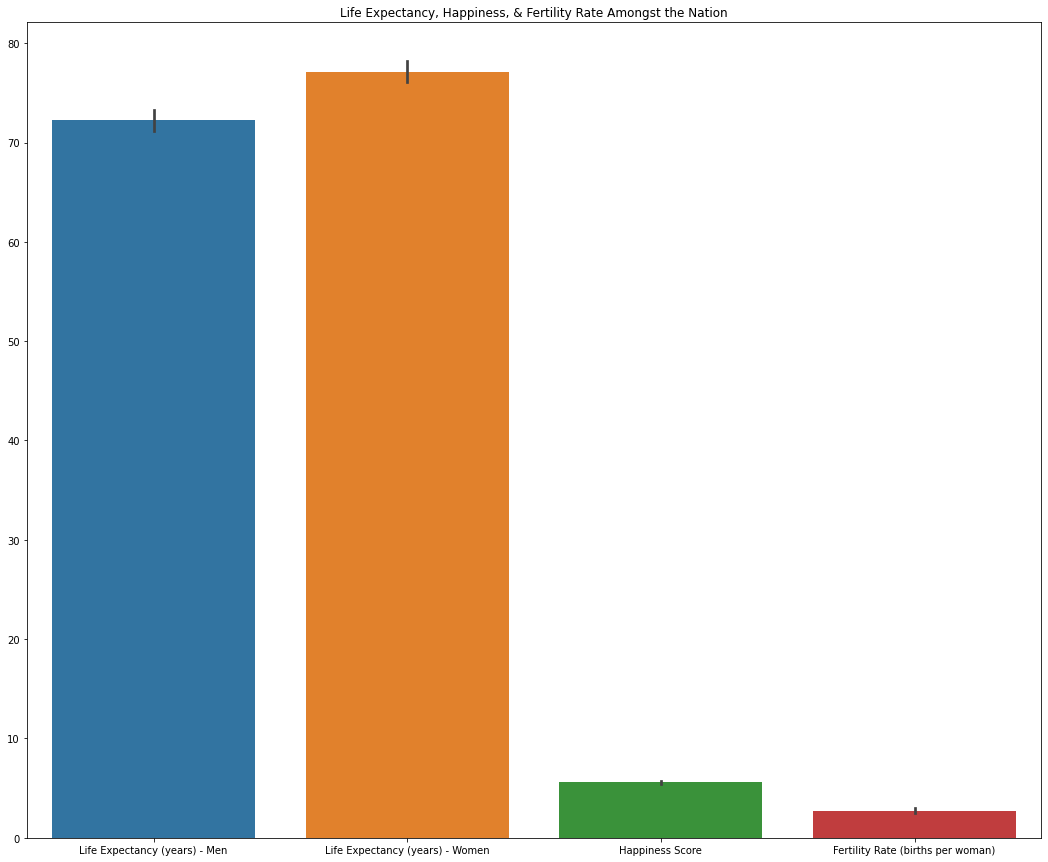

In [11]:
plt.figure(figsize = (40, 15))
plt.subplot(1, 2, 1)
sns.barplot(data = life)
plt.title("Life Expectancy, Happiness, & Fertility Rate Amongst the Nation")

Text(0.5, 1.0, 'Suicide Rate in all Nations')

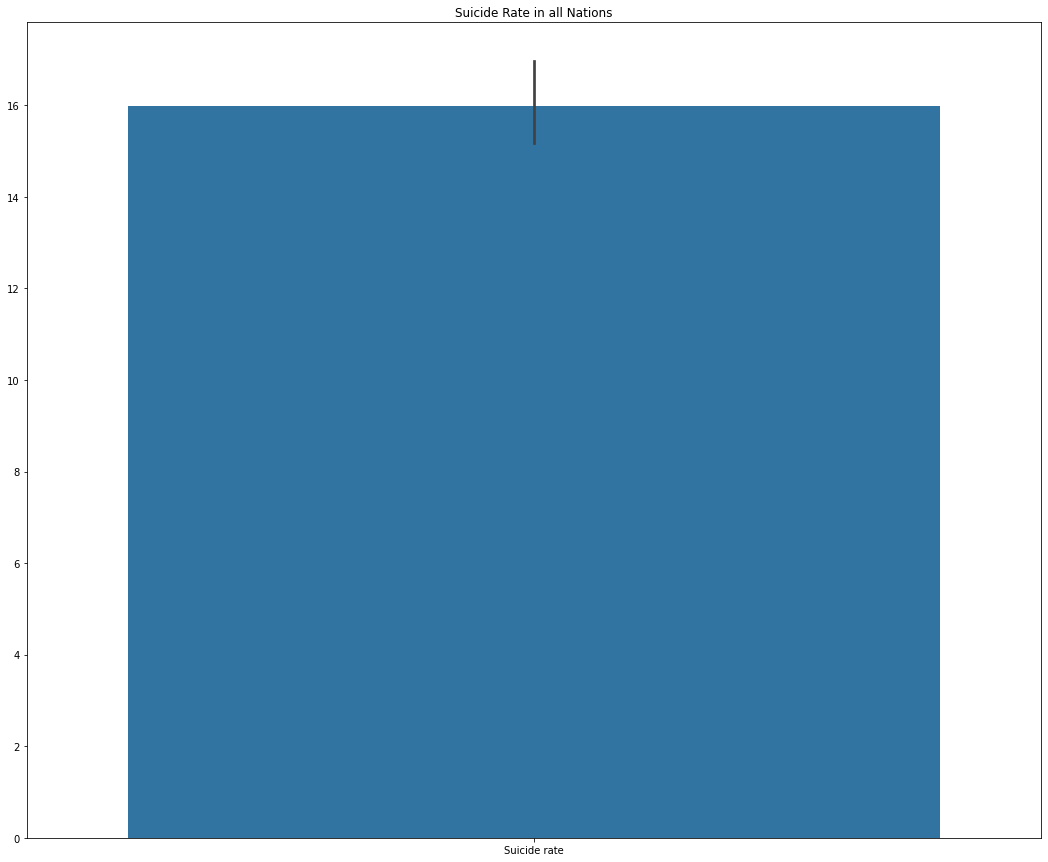

In [12]:
plt.figure(figsize = (40, 15))
plt.subplot(1, 2, 1)
sns.barplot(data = deletion)
plt.title("Suicide Rate in all Nations")

In [13]:
# Let us see what we can learn from this graph, but more as a description

life.head(15).style.background_gradient(cmap = 'brg')

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.600000,68.200000,3.794000,4.700000
1,Albania,74.800000,81.300000,4.959000,1.700000
2,Algeria,73.300000,78.900000,5.605000,2.900000
3,Andorra,81.700000,84.800000,6.955000,1.400000
4,Angola,58.100000,65.600000,4.105000,5.300000
5,Antigua and Barbuda,74.400000,78.900000,6.102000,2.200000
6,Argentina,74.700000,80.400000,6.365000,2.300000
7,Armenia,72.600000,79.400000,4.853000,1.800000
8,Australia,80.500000,84.300000,7.313000,1.700000
9,Austria,81.200000,84.200000,7.456000,1.500000


### In this description of the 'Life Expectancy' dataset, the lowest color represents the lowest number of years a man and a woman live, as well as the level of happiness, and fertility rate among the women. The lowest color is blue and the highest dark green.

> # If you would like to know how to create colorful description of the data, check the link below:

https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [14]:
life.head(15).style.background_gradient(cmap = 'brg').highlight_max(axis = 0, color = 'green')

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.600000,68.200000,3.794000,4.700000
1,Albania,74.800000,81.300000,4.959000,1.700000
2,Algeria,73.300000,78.900000,5.605000,2.900000
3,Andorra,81.700000,84.800000,6.955000,1.400000
4,Angola,58.100000,65.600000,4.105000,5.300000
5,Antigua and Barbuda,74.400000,78.900000,6.102000,2.200000
6,Argentina,74.700000,80.400000,6.365000,2.300000
7,Armenia,72.600000,79.400000,4.853000,1.800000
8,Australia,80.500000,84.300000,7.313000,1.700000
9,Austria,81.200000,84.200000,7.456000,1.500000


### In this description of the 'Life Expectancy' dataset, the lowest color represents the lowest number of years a man and a woman live, as well as the level of happiness, and fertility rate among the women. The lowest color is blue and the highest dark green. We also highlight the last country shown

In [15]:
life.head(15).style.background_gradient(cmap = 'brg').highlight_max(axis = 0, color = 'green').highlight_min(axis = 0, color = 'red')

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.600000,68.200000,3.794000,4.700000
1,Albania,74.800000,81.300000,4.959000,1.700000
2,Algeria,73.300000,78.900000,5.605000,2.900000
3,Andorra,81.700000,84.800000,6.955000,1.400000
4,Angola,58.100000,65.600000,4.105000,5.300000
5,Antigua and Barbuda,74.400000,78.900000,6.102000,2.200000
6,Argentina,74.700000,80.400000,6.365000,2.300000
7,Armenia,72.600000,79.400000,4.853000,1.800000
8,Australia,80.500000,84.300000,7.313000,1.700000
9,Austria,81.200000,84.200000,7.456000,1.500000


### In this description of the 'Life Expectancy' dataset, the lowest color represents the lowest number of years a man and a woman live, as well as the level of happiness, and fertility rate among the women. The lowest color is blue and the highest dark green. We also highlight the first and last countries shown

In [16]:
deletion.head(15).style.background_gradient(cmap = 'turbo').highlight_min(axis = 0, color = 'red').highlight_max(axis = 0, color = 'green')

,Country,GDP per capita,Suicide rate
0,Afghanistan,"1,105",20.600000
1,Albania,"4,932",32.400000
2,Algeria,"4,534",15.600000
3,Andorra,"46,622",18.900000
4,Angola,"2,077",20.500000
5,Antigua and Barbuda,"14,447",18.800000
6,Argentina,"14,647",18.500000
7,Armenia,"3,456",39.700000
8,Australia,"59,542",10.700000
9,Austria,"61,906",11.500000


### In this description of the 'Suicide Rate' dataset, the lowest color represents the lowest number of years a man and a woman live, as well as the level of happiness, and fertility rate among the women. The lowest color is red and the highest dark green. We also highlight the first and last countries shown

In [17]:
deletion.head(15).style.background_gradient(cmap = 'PuBu')

,Country,GDP per capita,Suicide rate
0,Afghanistan,"1,105",20.600000
1,Albania,"4,932",32.400000
2,Algeria,"4,534",15.600000
3,Andorra,"46,622",18.900000
4,Angola,"2,077",20.500000
5,Antigua and Barbuda,"14,447",18.800000
6,Argentina,"14,647",18.500000
7,Armenia,"3,456",39.700000
8,Australia,"59,542",10.700000
9,Austria,"61,906",11.500000


In [18]:
deletion.head(15).style.background_gradient(cmap = 'PuBu').highlight_min(axis = 0, color = 'orange').highlight_max(axis = 0, color = 'grey')

,Country,GDP per capita,Suicide rate
0,Afghanistan,"1,105",20.600000
1,Albania,"4,932",32.400000
2,Algeria,"4,534",15.600000
3,Andorra,"46,622",18.900000
4,Angola,"2,077",20.500000
5,Antigua and Barbuda,"14,447",18.800000
6,Argentina,"14,647",18.500000
7,Armenia,"3,456",39.700000
8,Australia,"59,542",10.700000
9,Austria,"61,906",11.500000


### In this description of the 'Suicide Rate' dataset, the lowest color represents the lowest number of years a man and a woman live, as well as the level of happiness, and fertility rate among the women. The lowest color is orange and the highest dark grey. We also highlight the first and last countries shown

In [19]:
# We can also look at the last countries in the dataset to see which ones have the lowest and highest suicide rate

deletion.tail(15).style.background_gradient(cmap = 'plasma')

,Country,GDP per capita,Suicide rate
125,Oman,"19,695",12.900000
126,Pakistan,"1,626",9.600000
127,Palau,"14,947",15.900000
128,Panama,"11,978",10.500000
129,Papua New Guinea,"2,939",15.900000
130,Paraguay,"4,527",15.000000
131,Peru,"6,927",12.700000
132,Philippines,"3,150",11.300000
133,Poland,"18,746",20.300000
134,Portugal,"24,027",13.200000


#### Thailand has the highest suicide rate and Pakistan with the lowest

In [20]:
# How about we look to see which country has the highest and lowest suicide rate
deletion.style.background_gradient(cmap = 'RdPu')

,Country,GDP per capita,Suicide rate
0,Afghanistan,"1,105",20.600000
1,Albania,"4,932",32.400000
2,Algeria,"4,534",15.600000
3,Andorra,"46,622",18.900000
4,Angola,"2,077",20.500000
5,Antigua and Barbuda,"14,447",18.800000
6,Argentina,"14,647",18.500000
7,Armenia,"3,456",39.700000
8,Australia,"59,542",10.700000
9,Austria,"61,906",11.500000


### In this description, we can see which countries have the highest suicide rates vs those with the lowest. 
### Highest Suicide rate:
1st place: Armenia; 2nd: Latvia; 3rd: Albania

### Lowest Suicide rate:
1st: Pakistan; 2nd: Canada; 3rd: Kenya

### But let us refine this description by setting up an interval for high, medium, and low suicide rate

> #### Low: < 13.5 

> #### Medium: >= 13.5 and < 20

> #### High: >= 20

In [21]:
# Countries with the lowest level of Suicide Rate among the Nations

lowsu = deletion[deletion['Suicide rate'] < 13.5].sort_values('Suicide rate')
lowsu.style.background_gradient(cmap = 'terrain')

,Country,GDP per capita,Suicide rate
126,Pakistan,"1,626",9.600000
30,Canada,"54,087",10.100000
86,Kenya,"1,631",10.200000
100,Malawi,806,10.300000
64,Ghana,"2,045",10.300000
41,Cote d'Ivoire,"2,315",10.400000
128,Panama,"11,978",10.500000
75,India,"2,190",10.500000
81,Italy,"33,362",10.600000
108,Mexico,"9,481",10.600000


In [22]:
# Countries with the medium level of Suicide Rate among the Nations

medsu = deletion[(deletion['Suicide rate'] >= 13.5) & (deletion['Suicide rate'] < 20)].sort_values('Suicide rate')
medsu.style.background_gradient(cmap = 'gnuplot')

,Country,GDP per capita,Suicide rate
50,Ecuador,"6,755",13.500000
26,Burkina Faso,"1,302",13.700000
38,"Congo, Dem. Rep.",764,13.800000
56,Ethiopia,793,14.000000
138,United States,"65,112",14.000000
97,Luxembourg,"118,287",14.000000
82,Jamaica,"5,399",14.100000
44,Cyprus,"30,902",14.100000
101,Malaysia,"10,906",14.100000
12,Bahrain,"34,734",14.300000


In [23]:
# Countries with the highest level of Suicide Rate among the Nations

higsu = deletion[deletion['Suicide rate'] >= 20].sort_values('Suicide rate')
higsu.style.background_gradient(cmap = 'jet')

,Country,GDP per capita,Suicide rate
133,Poland,"18,746",20.300000
22,Botswana,"8,779",20.400000
4,Angola,"2,077",20.500000
0,Afghanistan,"1,105",20.600000
10,Azerbaijan,"6,441",21.100000
98,Macedonia,"7,387",21.400000
89,Kyrgyzstan,"3,421",21.500000
116,Namibia,"5,647",21.600000
17,Belize,"4,246",21.900000
112,Montenegro,"7,658",22.000000


In [24]:
# Top 15 Countries with Lowest Suicide rate

lowestsu = deletion[deletion['Suicide rate'] < 13.5].sort_values('Suicide rate')
lowestsu.head(15).style.background_gradient(cmap = 'terrain')

,Country,GDP per capita,Suicide rate
126,Pakistan,"1,626",9.600000
30,Canada,"54,087",10.100000
86,Kenya,"1,631",10.200000
100,Malawi,806,10.300000
64,Ghana,"2,045",10.300000
41,Cote d'Ivoire,"2,315",10.400000
128,Panama,"11,978",10.500000
75,India,"2,190",10.500000
81,Italy,"33,362",10.600000
108,Mexico,"9,481",10.600000


In [25]:
# Top 15 Countries with the Highest Suicide rate

highestsu = deletion[deletion['Suicide rate'] >= 20].sort_values('Suicide rate')
highestsu.tail(15).style.background_gradient(cmap = 'jet')

,Country,GDP per capita,Suicide rate
112,Montenegro,"7,658",22.000000
85,Kazakhstan,"11,420",22.700000
55,Estonia,"21,179",24.600000
25,Bulgaria,"7,386",25.300000
70,Guyana,"3,936",25.600000
96,Lithuania,"21,140",27.400000
139,Thailand,"6,792",27.800000
21,Bosnia and Herzegovina,"5,632",28.100000
62,Georgia,"4,361",28.200000
110,Moldova,"2,547",29.500000


## Printing out the first 3 row of Life dataset

In [26]:
life.head(3)

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.6,68.2,3.794,4.7
1,Albania,74.8,81.3,4.959,1.7
2,Algeria,73.3,78.9,5.605,2.9


In [27]:
life.style.background_gradient(cmap = 'tab10')

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.600000,68.200000,3.794000,4.700000
1,Albania,74.800000,81.300000,4.959000,1.700000
2,Algeria,73.300000,78.900000,5.605000,2.900000
3,Andorra,81.700000,84.800000,6.955000,1.400000
4,Angola,58.100000,65.600000,4.105000,5.300000
5,Antigua and Barbuda,74.400000,78.900000,6.102000,2.200000
6,Argentina,74.700000,80.400000,6.365000,2.300000
7,Armenia,72.600000,79.400000,4.853000,1.800000
8,Australia,80.500000,84.300000,7.313000,1.700000
9,Austria,81.200000,84.200000,7.456000,1.500000


### In this description, we can see which countries have the highest Fertility rates vs those with the lowest. 

### But let us refine this description by setting up an interval for high, medium, and low suicide rate

> #### Low: < 2

> #### Medium: >= 2 and < 3

> #### High: >= 3

In [28]:
# Countries with the Lowest level Fertility rate

lowfer = life[life['Fertility Rate (births per woman)'] < 2].sort_values('Fertility Rate (births per woman)')
lowfer.style.background_gradient(cmap = 'tab20')

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
138,Singapore,82.500000,85.900000,6.710000,1.200000
89,"Korea, Rep.",81.200000,87.000000,5.538000,1.200000
81,Italy,82.700000,87.000000,6.442000,1.300000
136,Portugal,82.000000,85.500000,6.346000,1.300000
135,Poland,77.100000,82.900000,6.442000,1.300000
65,Greece,81.500000,85.700000,6.456000,1.300000
44,Cyprus,78.600000,82.600000,6.749000,1.300000
107,Malta,82.000000,85.500000,6.441000,1.300000
3,Andorra,81.700000,84.800000,6.955000,1.400000
94,Latvia,74.800000,81.300000,6.646000,1.400000


In [29]:
# Countries with the Medium level of Fertility rate
medfer = life[(life['Fertility Rate (births per woman)'] >= 2) & (life['Fertility Rate (births per woman)'] < 3)].sort_values('Fertility Rate (births per woman)')
medfer.style.background_gradient(cmap = 'twilight')

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
48,Dominica,74.500000,79.200000,6.175000,2.100000
50,Ecuador,76.500000,81.500000,5.958000,2.100000
122,New Zealand,81.500000,85.000000,7.286000,2.100000
28,Cabo Verde,74.500000,80.200000,5.507000,2.100000
66,Grenada,74.600000,79.600000,5.854000,2.100000
104,Malaysia,74.400000,78.400000,6.141000,2.100000
11,Bahamas,71.600000,75.200000,6.591000,2.100000
10,Azerbaijan,70.700000,75.800000,5.129000,2.100000
12,Bahrain,75.700000,78.800000,6.498000,2.100000
13,Bangladesh,68.500000,75.700000,4.527000,2.200000


In [30]:
# Coutries with the Highest level of Fertility rate
higfer = life[life['Fertility Rate (births per woman)'] >= 3].sort_values('Fertility Rate (births per woman)')
higfer.style.background_gradient(cmap = 'bwr')

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
22,Botswana,62.400000,69.900000,4.517000,3.100000
84,Jordan,74.600000,78.600000,5.081000,3.200000
71,Haiti,63.500000,70.000000,3.766000,3.200000
108,Marshall Islands,66.900000,72.000000,5.253000,3.300000
128,Pakistan,66.500000,72.000000,5.194000,3.300000
51,Egypt,73.300000,77.300000,5.041000,3.400000
20,Bolivia,69.200000,75.100000,5.139000,3.400000
96,Lesotho,60.600000,66.700000,3.971000,3.400000
87,Kiribati,68.500000,73.200000,4.934000,3.500000
47,Djibouti,65.700000,71.300000,4.526000,3.700000


In [31]:
# Top 15 Countries with the Lowest Fertility rate

lowfer = life[life['Fertility Rate (births per woman)'] < 2].sort_values('Fertility Rate (births per woman)')
lowfer.head(15).style.background_gradient(cmap = 'tab20')

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
138,Singapore,82.500000,85.900000,6.710000,1.200000
89,"Korea, Rep.",81.200000,87.000000,5.538000,1.200000
81,Italy,82.700000,87.000000,6.442000,1.300000
136,Portugal,82.000000,85.500000,6.346000,1.300000
135,Poland,77.100000,82.900000,6.442000,1.300000
65,Greece,81.500000,85.700000,6.456000,1.300000
44,Cyprus,78.600000,82.600000,6.749000,1.300000
107,Malta,82.000000,85.500000,6.441000,1.300000
3,Andorra,81.700000,84.800000,6.955000,1.400000
94,Latvia,74.800000,81.300000,6.646000,1.400000


In [32]:
# Top First 15 Countries with Medium Fertility rate

medfer = life[(life['Fertility Rate (births per woman)'] >= 2) & (life['Fertility Rate (births per woman)'] < 3)].sort_values('Fertility Rate (births per woman)')
medfer.head(15).style.background_gradient(cmap = 'twilight')

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
48,Dominica,74.500000,79.200000,6.175000,2.100000
50,Ecuador,76.500000,81.500000,5.958000,2.100000
122,New Zealand,81.500000,85.000000,7.286000,2.100000
28,Cabo Verde,74.500000,80.200000,5.507000,2.100000
66,Grenada,74.600000,79.600000,5.854000,2.100000
104,Malaysia,74.400000,78.400000,6.141000,2.100000
11,Bahamas,71.600000,75.200000,6.591000,2.100000
10,Azerbaijan,70.700000,75.800000,5.129000,2.100000
12,Bahrain,75.700000,78.800000,6.498000,2.100000
13,Bangladesh,68.500000,75.700000,4.527000,2.200000


In [33]:
# Top 15 Countries with the Highest Fertility rate

higfer = life[life['Fertility Rate (births per woman)'] >= 3].sort_values('Fertility Rate (births per woman)')
higfer.tail(15).style.background_gradient(cmap = 'bwr')

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
117,Mozambique,66.700000,71.500000,4.325000,5.200000
4,Angola,58.100000,65.600000,4.105000,5.300000
103,Malawi,64.100000,68.200000,3.973000,5.400000
18,Benin,61.100000,67.600000,4.923000,5.400000
97,Liberia,64.000000,69.300000,3.979000,5.400000
32,Central African Republic,57.600000,65.200000,3.351000,5.400000
33,Chad,59.900000,66.200000,4.053000,5.500000
38,"Congo, Dem. Rep.",61.300000,65.800000,3.462000,5.500000
69,Guinea-Bissau,61.000000,66.400000,3.652000,5.500000
68,Guinea,63.200000,67.500000,4.064000,5.500000


In [34]:
import plotly.express as px

scatlife = px.scatter(life, x = 'Life Expectancy (years) - Men', y = 'Life Expectancy (years) - Women',
                      color = "Happiness Score", size = 'Fertility Rate (births per woman)',
                    log_x = True, size_max = 60)

scatlife.show()

## MERGING BOTH DATASETS TO CREATE NEW DATASET

In [39]:
delife = pd.merge(life, deletion)
delife.head()

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman),GDP per capita,Suicide rate
0,Afghanistan,60.6,68.2,3.794,4.7,"1,105",20.6
1,Albania,74.8,81.3,4.959,1.7,"4,932",32.4
2,Algeria,73.3,78.9,5.605,2.9,"4,534",15.6
3,Andorra,81.7,84.8,6.955,1.4,"46,622",18.9
4,Angola,58.1,65.6,4.105,5.3,"2,077",20.5


In [40]:
delscat = px.scatter(delife, x = 'Life Expectancy (years) - Men', y = 'Life Expectancy (years) - Women',
                      color = "GDP per capita", size = 'Suicide rate',
                    log_x = True, size_max = 60)

delscat.show()

In [41]:
delscat = px.scatter(delife, x = 'Life Expectancy (years) - Men', y = 'Life Expectancy (years) - Women',
                      color = "GDP per capita", size = 'Happiness Score',
                    log_x = True, size_max = 60)

delscat.show()

In [42]:
delscat = px.scatter(delife, x = 'Life Expectancy (years) - Men', y = 'Life Expectancy (years) - Women',
                      color = "Suicide rate", size = 'Happiness Score',
                    log_x = True, size_max = 60)

delscat.show()

Even though it is quite clear that in the majority of times, the happier a person is, the less likelihood of that person to commit suicide. But there is always that grey area where happiness is not at the very top nor the very bottom but you could conclude that it is fairly in a great middle ground but it is in that area where the highest suicide rate happens, which baffles me.